In [1]:
!pip install biopandas

Defaulting to user installation because normal site-packages is not writeable


In [1]:
# Cell 1: Imports
import gen_structure_graph as gsg
import matplotlib.pyplot as plt
import seaborn as sns
import math

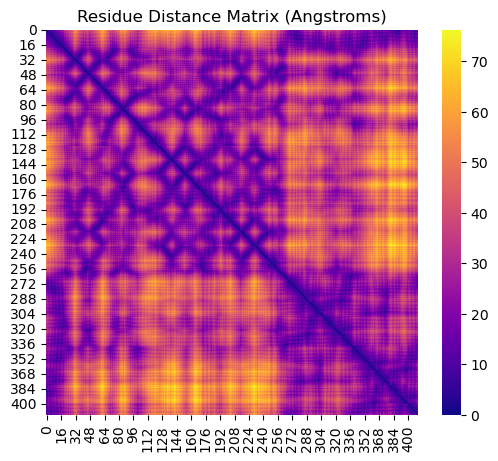

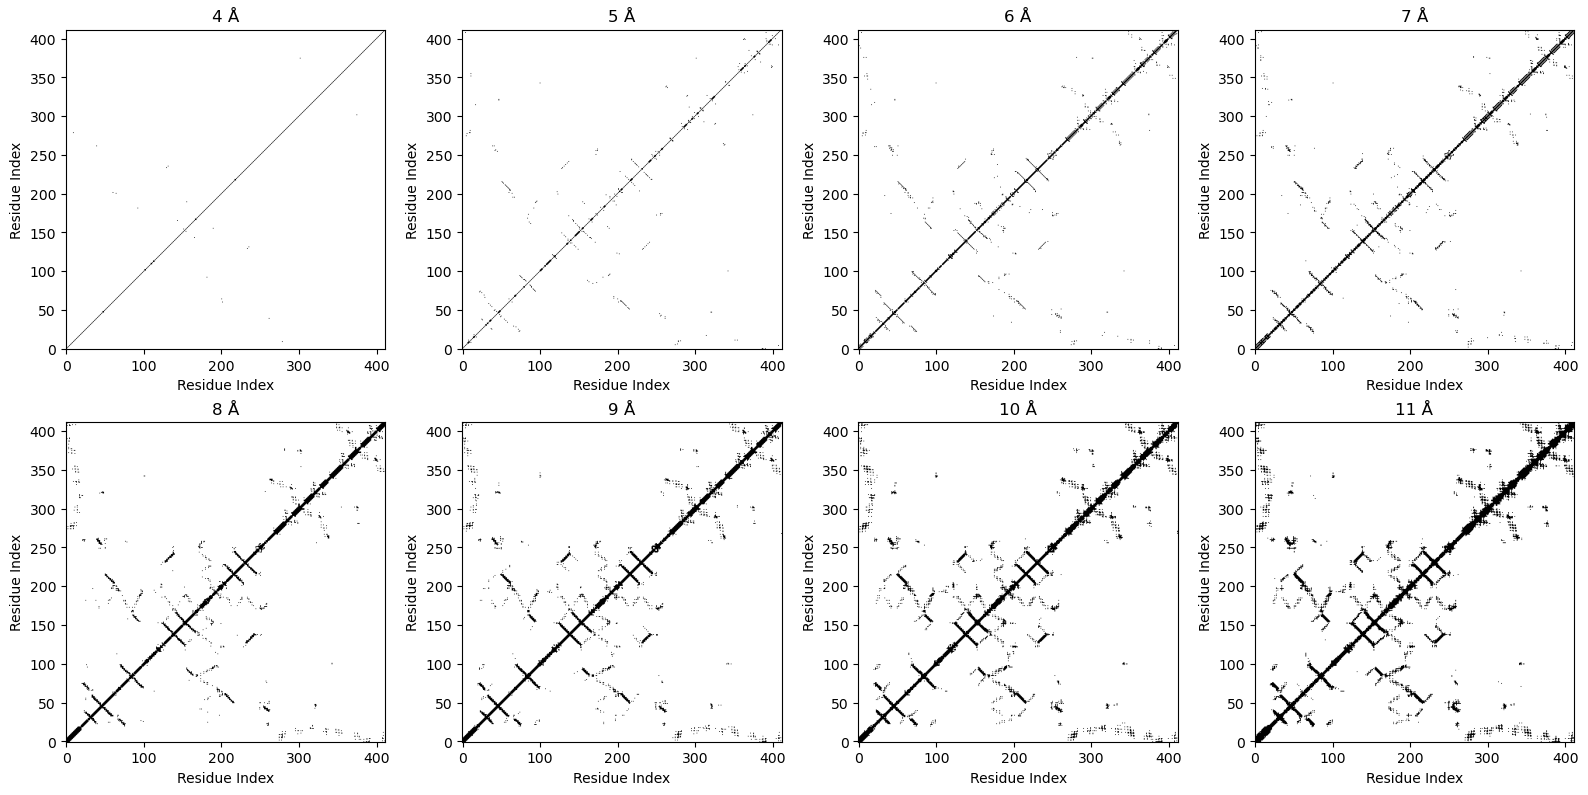

In [2]:
# 1. Load file
# Using your specific path to the CIF file
file_path = r"C:/Users/Shuyu/Desktop/Protein_Structure_Graph/structures/Pinkycamp_Ca_AF3.cif" 
# Note: Added 'r' before the string to handle backslashes correctly in Windows paths
dist_mtx = gsg.get_distance_matrix(file_path, atom_type='CB')

# 2. Plot Distance Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(dist_mtx, cmap='plasma')
plt.title("Residue Distance Matrix (Angstroms)")
plt.show()

# 3. Plot Contact Maps with different thresholds in 2 rows
thresholds = [4, 5, 6, 7, 8, 9, 10, 11]
num_thresholds = len(thresholds)
rows = 2
cols = math.ceil(num_thresholds / rows)  # Calculate columns needed (4 in this case)

fig, axes = plt.subplots(rows, cols, figsize=(16, 8))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

for i, t in enumerate(thresholds):
    # Generate binary contact map
    cmap = gsg.get_contact_map(dist_mtx, t)
    
    # Plot on the corresponding subplot
    axes[i].imshow(cmap, cmap='Greys', origin='lower')
    axes[i].set_title(f"{t} Å")
    axes[i].set_xlabel("Residue Index")
    axes[i].set_ylabel("Residue Index")

# Hide any empty subplots if the number of thresholds is not a multiple of rows*cols
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [3]:
# --- 3. Nearby Residue Query (1-letter code) ---
target_idx = 281 
expected_aa = 'L' 
try:
    results = gsg.get_nearby_residues(file_path, target_idx, expected_aa, thresholds=[4, 5, 6, 7, 8])
    for t, neighbors in results.items():
        print(f"Within {t}Å: {neighbors}")
except Exception as e:
    print(e)

Validated: LEU(L) found at index 281.

Within 4Å: [{'index': 280, 'res_1': 'S', 'dist': np.float64(3.86)}, {'index': 282, 'res_1': 'F', 'dist': np.float64(3.84)}]
Within 5Å: [{'index': 280, 'res_1': 'S', 'dist': np.float64(3.86)}, {'index': 282, 'res_1': 'F', 'dist': np.float64(3.84)}]
Within 6Å: [{'index': 278, 'res_1': 'A', 'dist': np.float64(5.48)}, {'index': 279, 'res_1': 'F', 'dist': np.float64(5.42)}, {'index': 280, 'res_1': 'S', 'dist': np.float64(3.86)}, {'index': 282, 'res_1': 'F', 'dist': np.float64(3.84)}, {'index': 283, 'res_1': 'D', 'dist': np.float64(5.84)}]
Within 7Å: [{'index': 277, 'res_1': 'E', 'dist': np.float64(7.0)}, {'index': 278, 'res_1': 'A', 'dist': np.float64(5.48)}, {'index': 279, 'res_1': 'F', 'dist': np.float64(5.42)}, {'index': 280, 'res_1': 'S', 'dist': np.float64(3.86)}, {'index': 282, 'res_1': 'F', 'dist': np.float64(3.84)}, {'index': 283, 'res_1': 'D', 'dist': np.float64(5.84)}, {'index': 284, 'res_1': 'K', 'dist': np.float64(6.37)}, {'index': 375, 're

In [4]:
# Search for residues within 6.0 Angstroms of each Calcium ion
ca_contacts = gsg.get_calcium_contacts(file_path, threshold=6.0, target_atom_type='CA')

print(f"--- Calcium Coordination Analysis ---")
for entry in ca_contacts:
    print(f"\n{entry['ca_label']}:")
    if not entry['neighbors']:
        print("  No residues found within threshold.")
    else:
        for nb in entry['neighbors']:
            print(f"  - Index {nb['index']}: {nb['res_name_3']}({nb['res_name_1']}) at {nb['dist']}Å")

--- Calcium Coordination Analysis ---

Ion_1(Chain:B):
  - Index 392: ASP(D) at 4.06Å
  - Index 393: ILE(I) at 5.6Å
  - Index 394: ASP(D) at 4.85Å
  - Index 395: GLY(G) at 5.3Å
  - Index 396: ASP(D) at 4.69Å
  - Index 397: GLY(G) at 5.58Å
  - Index 398: GLN(Q) at 4.35Å
  - Index 399: VAL(V) at 4.4Å
  - Index 400: ASN(N) at 5.49Å

Ion_2(Chain:C):
  - Index 319: ASP(D) at 4.28Å
  - Index 320: ALA(A) at 5.68Å
  - Index 321: ASP(D) at 5.09Å
  - Index 322: GLY(G) at 5.47Å
  - Index 323: ASP(D) at 4.75Å
  - Index 324: GLY(G) at 5.58Å
  - Index 325: THR(T) at 4.16Å
  - Index 326: PHE(F) at 4.62Å
  - Index 327: ASP(D) at 5.68Å

Ion_3(Chain:D):
  - Index 356: ASP(D) at 4.21Å
  - Index 357: LYS(K) at 5.48Å
  - Index 358: ASP(D) at 4.78Å
  - Index 359: GLY(G) at 5.51Å
  - Index 360: ASN(N) at 4.92Å
  - Index 361: GLY(G) at 5.92Å
  - Index 362: TYR(Y) at 4.47Å
  - Index 363: ILE(I) at 4.52Å
  - Index 364: GLY(G) at 5.56Å

Ion_4(Chain:E):
  - Index 283: ASP(D) at 4.23Å
  - Index 284: LYS(K) at 5.7Å